# Error Analysis: Identify characteristics of misclassified sentences

- For the sentences that were incorrectly classified, what are the characteristics in them?
- For the ones that are classified as a prediction, do our prediction properties exist?

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing

In [2]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', None)

## Load Data

In [3]:
base_data_path = os.path.join(notebook_dir, '../data')
combine_data_path = os.path.join(base_data_path, 'financial_phrase_bank/combined_generated_fin_phrase_bank')

In [4]:
model_results_path = os.path.join(combine_data_path, 'sentence_label-all_classifiers_with_results-v1.csv')
model_results_df = DataProcessing.load_from_file(model_results_path, 'csv', sep=',')
model_results_df.head(3)

,Base Sentence,Sentence Label,Author Type,Embedding,Normalized Embeddings,perceptron,sgd_classifier,logistic_regression,ridge_classifier,decision_tree_classifier,random_forest_classifier,gradient_boosting_classifier,llama-3.1-70b-instruct,llama-3.1-8b-instruct,llama-3.3-70b-instruct,mistral-7b-instruct,mistral-small-3.1,codestral-22b,gpt-oss-20b,gpt-oss-120b,granite-3.3-8b-instruct
0,Aspocomp intends to set up a plant to manufacture printed circuit boards with an investment of Rs310 crore .,0,1,[ 3.10125723e-02 1.48145273e-01 1.18822167e-02 -4.00886834e-02\n 2.18477882e-02 -7.52243698e-02 -6.43576309e-02 -1.18781418e-01\n -9.42035094e-02 1.69367039e+00 -1.97394520e-01 6.25598105e-03\n 4.40751575e-02 -4.00502793e-02 -4.52028252e-02 -1.13160096e-01\n 8.78665820e-02 1.32680905e+00 -4.84675802e-02 -3.56700621e-03\n 5.54845780e-02 9.94077399e-02 -1.34666905e-01 1.01711877e-01\n 6.37347773e-02 5.76260537e-02 -8.55392031e-03 -5.17340861e-02\n -9.67892632e-02 -4.00202125e-02 -4.66998853e-02 2.48341095e-02\n -1.75986104e-02 2.24689487e-02 4.00095731e-02 -1.50968343e-01\n 3.12316287e-02 8.40115175e-02 6.51817173e-02 -1.11669578e-01\n 4.81054671e-02 9.21993256e-02 1.43066615e-01 -2.96952873e-01\n -6.12954162e-02 -9.03191715e-02 3.97677906e-02 -3.97728458e-02\n -7....,[ 1.4120030e+00 -1.1126934e+00 8.9782916e-02 -6.6743813e-02\n -3.7037823e-01 -6.0530519e-01 -9.2802191e-01 -1.2312902e+00\n -1.7777984e+00 -3.0181044e-01 9.9699152e-01 -2.8869405e-01\n -4.5153311e-01 -2.6786438e-01 -5.6393570e-03 -1.2585411e+00\n 1.6161768e+00 1.3745358e+00 1.0518684e+00 4.4895628e-01\n 5.3809673e-01 7.0892632e-01 -1.8697438e+00 2.5000875e+00\n 4.8316771e-01 -7.1109168e-02 1.5739738e+00 -1.1464823e+00\n -1.6519629e+00 -1.5582638e+00 -8.2016826e-01 3.2399574e-01\n -2.7373379e-01 -8.1674218e-01 -2.3484817e-02 -2.1448696e+00\n 6.6440696e-01 6.2469262e-01 1.1777695e+00 -1.1532152e+00\n 6.7729610e-01 7.1531069e-01 8.3312702e-01 -4.0233145e+00\n -1.2297469e+00 -1.5874187e+00 1.4470621e+00 2.0973889e-02\n -1.5879422e+00 3.4062797e-01 -3.7409711e-01 -4.989...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Finnish consulting and engineering group Poyry Plc ( OMX Helsinki : POY ) said on Wednesday ( 1 October ) that it has been awarded a contract by Tanqia Dibba FZC as owner-engineer for the wastewater system of Dibba , Emirate of Fujairah , UAE .",0,1,[ 4.70041996e-03 1.10228069e-01 -4.77573602e-03 -9.56104398e-02\n 5.52534722e-02 -7.00817332e-02 -2.05142405e-02 -1.88917577e-01\n -1.04249775e-01 1.33263934e+00 -2.44876042e-01 6.75175413e-02\n -1.49942748e-02 -4.06556427e-02 -5.41962422e-02 -5.62920608e-02\n -5.34963198e-02 8.25075388e-01 -4.66980301e-02 -1.90773290e-02\n 9.21309367e-02 -4.51208055e-02 -1.37235259e-03 2.78238151e-02\n 5.95768094e-02 7.14695230e-02 -6.53408244e-02 -2.12525483e-02\n 1.03413671e-01 4.48262393e-02 4.36710976e-02 -1.38843171e-02\n 3.21916752e-02 8.28981474e-02 3.51038612e-02 6.20842911e-03\n 1.43408813e-02 3.44430916e-02 -3.06746140e-02 -1.25587946e-02\n 5.69351614e-02 2.96466853e-02 3.29996310e-02 3.74354306e-03\n -6.46679699e-02 -1.41989226e-02 -7.01283365e-02 2.36671865e-02\n 2....,[ 1.09362805e+00 -1.62451851e+00 -1.65100798e-01 -9.56259787e-01\n 4.15408053e-02 -5.33732831e-01 -1.78139552e-01 -2.06649685e+00\n -1.91614807e+00 -1.50415599e+00 4.32611406e-01 4.96168882e-01\n -1.36563015e+00 -2.76857466e-01 -9.52787399e-02 -3.11303347e-01\n -7.22661614e-01 -1.60111678e+00 1.07873595e+00 2.00796470e-01\n 1.14176524e+00 -1.31319058e+00 6.96443990e-02 1.48120904e+00\n 4.19971019e-01 1.25214577e-01 8.07624400e-01 -6.86450183e-01\n 1.40184307e+00 -3.70196342e-01 7.16911912e-01 -2.34501705e-01\n 5.22707343e-01 1.74109451e-02 -9.85290855e-02 4.73820418e-01\n 4.31317925e-01 -1.41181558e-01 -1.94443032e-01 1.55737445e-01\n 8.26632380e-01 -2.50532269e-01 -5.49674511e-01 6.59554422e-01\n -1.27693951e+00 -3.35813284e-01 -1.00587562e-01 7.66250908e-01\n -1....,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Diluted EPS rose to EUR3 .68 from EUR0 .50 .,0,1,[-2.69290894e-01 4.16

In [5]:
cols_to_drop = ["Author Type", "Embedding", "Normalized Embeddings"]
compare_y_vs_yhat_df = DataProcessing.drop_df_columns(model_results_df, cols_to_drop)
compare_y_vs_yhat_df.head(3)

,Base Sentence,Sentence Label,perceptron,sgd_classifier,logistic_regression,ridge_classifier,decision_tree_classifier,random_forest_classifier,gradient_boosting_classifier,llama-3.1-70b-instruct,llama-3.1-8b-instruct,llama-3.3-70b-instruct,mistral-7b-instruct,mistral-small-3.1,codestral-22b,gpt-oss-20b,gpt-oss-120b,granite-3.3-8b-instruct
0,Aspocomp intends to set up a plant to manufacture printed circuit boards with an investment of Rs310 crore .,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Finnish consulting and engineering group Poyry Plc ( OMX Helsinki : POY ) said on Wednesday ( 1 October ) that it has been awarded a contract by Tanqia Dibba FZC as owner-engineer for the wastewater system of Dibba , Emirate of Fujairah , UAE .",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Diluted EPS rose to EUR3 .68 from EUR0 .50 .,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
model_col_names = compare_y_vs_yhat_df.columns.to_list()[2:]
model_col_names

['perceptron',
 'sgd_classifier',
 'logistic_regression',
 'ridge_classifier',
 'decision_tree_classifier',
 'random_forest_classifier',
 'gradient_boosting_classifier',
 'llama-3.1-70b-instruct',
 'llama-3.1-8b-instruct',
 'llama-3.3-70b-instruct',
 'mistral-7b-instruct',
 'mistral-small-3.1',
 'codestral-22b',
 'gpt-oss-20b',
 'gpt-oss-120b',
 'granite-3.3-8b-instruct']

## Get misalignment 

- Per y and $y_{hat}$
- Per model
- Possibly realign where all models disagree on misalignment. Or, maybe not as worse case could be they misalign?

In [7]:
def get_misclassified_sentences(df):
    mismatch_per_sentence = []
    for idx, row in df.iterrows():
        sentence = row['Base Sentence']
        y = row['Sentence Label']
    
        for model_col_name in model_col_names:
            y_hat = row[model_col_name]

            if y != y_hat:
                mismatch = (idx, sentence, y, y_hat, model_col_name)
                if idx < 3:
                    print(f"{idx}-{sentence}")
                    print(f"\tMismatch: {mismatch}")
                mismatch_per_sentence.append(mismatch)

    return mismatch_per_sentence

In [8]:
misclassified_sentences = get_misclassified_sentences(compare_y_vs_yhat_df)
mismatch_col_names = ["Row", "Sentence", "True Label", "Model Label", "Model Name"]
misclassified_sentences_df = pd.DataFrame(misclassified_sentences, columns=mismatch_col_names)
misclassified_sentences_df.head()

,Row,Sentence,True Label,Model Label,Model Name
0,3,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,1,0,decision_tree_classifier
1,3,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,1,0,random_forest_classifier
2,7,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups .",1,0,perceptron
3,7,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups .",1,0,sgd_classifier
4,7,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups .",1,0,logistic_regression


In [9]:
mislabelled_pivot_table = pd.pivot_table(misclassified_sentences_df, values=["True Label", "Model Label"], index=["Row", "Sentence", "Model Name"], aggfunc="sum")
mislabelled_pivot_table.head()

Model Label  \
Row Sentence                                                                                                                                                             Model Name                              
3   Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.                                                                       decision_tree_classifier            0   
                                                                                                                                                                         random_forest_classifier            0   
7   STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups . codestral-22b                       0   
                                                                                                                                                                         decision_tree_classifier            0   
                                                                                                                                                                         gpt-oss-120b                        0   

                                                                                                                                                                                                   True Label  
Row Sentence                                                                                                                                                             Model Name                            
3   Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.                                                                       decision_tree_classifier           1  
                                                                                                                                                                         random_forest_classifier           1  
7   STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups . codestral-22b                      1  
                                                                                                                                                                         decision_tree_classifier           1  
                                                                                                                                                                         gpt-oss-120b                       1

In [11]:
def groupby_model_name(df, model_name):
    filt_llama = (df['Model Name'] == model_name)
    filt_df = df[filt_llama]
    return filt_df, len(filt_df)

model_dfs = []
for idx, row in misclassified_sentences_df.iterrows():
    model_name = row['Model Name']
    model_df, model_df_length = groupby_model_name(misclassified_sentences_df, model_name)
    # print(model_df)
    model_df["N Misclassified"] = model_df_length

    model_dfs.append(model_df)

/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_47450/3835449559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["N Misclassified"] = model_df_length
/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_47450/3835449559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["N Misclassified"] = model_df_length
/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_47450/3835449559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [12]:
each_model_df = pd.concat(model_dfs)
each_model_df.head(3)

,Row,Sentence,True Label,Model Label,Model Name,N Misclassified
0,3,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,1,0,decision_tree_classifier,95
6,7,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMENE Credit Suisse First Boston ( CFSB ) raised the fair value for shares in four of the largest Nordic forestry groups .",1,0,decision_tree_classifier,95
28,19,"Coach Sofia Rodriguez predicts on 08/10/2028, the win ratio at the Boston Celtics may rise.",1,0,decision_tree_classifier,95


In [18]:
len(model_results_df)

565

Model Name
decision_tree_classifier        0.831858
gpt-oss-120b                    0.856637
mistral-7b-instruct             0.858407
llama-3.1-8b-instruct           0.861947
gpt-oss-20b                     0.869027
granite-3.3-8b-instruct         0.897345
mistral-small-3.1               0.918584
random_forest_classifier        0.930973
codestral-22b                   0.934513
llama-3.3-70b-instruct          0.936283
gradient_boosting_classifier    0.943363
llama-3.1-70b-instruct          0.952212
sgd_classifier                  0.957522
perceptron                      0.966372
ridge_classifier                0.968142
logistic_regression             0.971681
Name: count, dtype: float64, Model Name
decision_tree_classifier        0.168142
gpt-oss-120b                    0.143363
mistral-7b-instruct             0.141593
llama-3.1-8b-instruct           0.138053
gpt-oss-20b                     0.130973
granite-3.3-8b-instruct         0.102655
mistral-small-3.1               0.081416
random

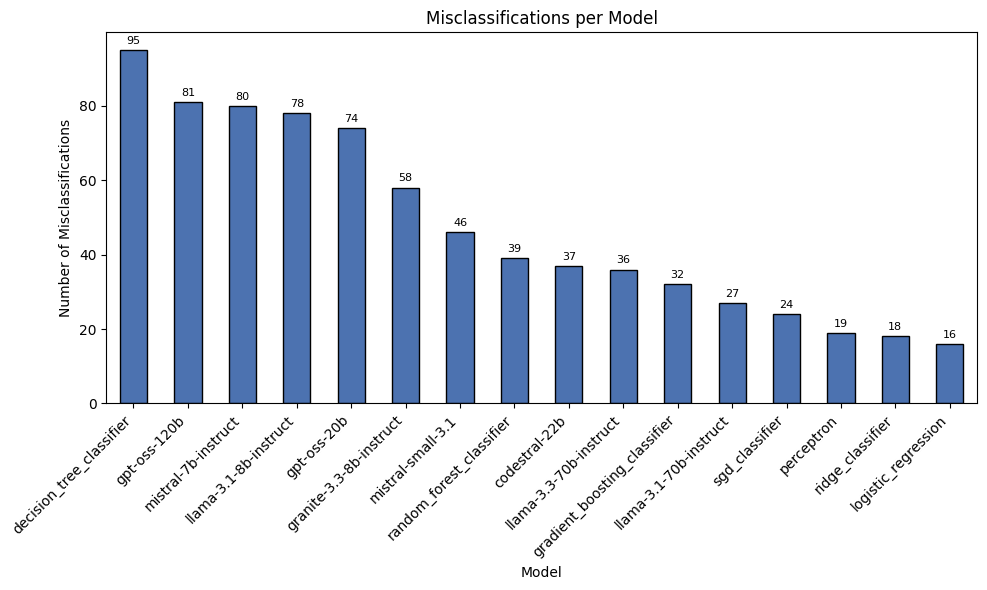

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1️⃣  Count the number of mismatches (i.e. rows) per model
# ------------------------------------------------------------------
miscounts = misclassified_sentences_df['Model Name'].value_counts()
misclassified_ratio = 1 - (miscounts / len(model_results_df))
properly_classified_ratio = 1 - misclassified_ratio # Should match classification
total_classified_ratio = misclassified_ratio + properly_classified_ratio
print(f"{misclassified_ratio}, {properly_classified_ratio} = {total_classified_ratio}")

#   miscounts is a Series:  index = model names, values = #misclassifications

# ------------------------------------------------------------------
# 2️⃣  Plot
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# bar chart: one bar per model
miscounts.plot(kind='bar', ax=ax, color='#4C72B0', edgecolor='black')

# aesthetics
ax.set_xlabel('Model')
ax.set_ylabel('Number of Misclassifications')
ax.set_title('Misclassifications per Model')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# show exact count on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [29]:




miscounts = misclassified_sentences_df['Model Name'].value_counts()
misclassified_ratio = (miscounts / len(model_results_df))
properly_classified_ratio = 1 - misclassified_ratio # Should match classification
total_classified_ratio = misclassified_ratio + properly_classified_ratio
# print(f"{misclassified_ratio}, {properly_classified_ratio} = {total_classified_ratio}")
# ------------------------------------------------------------------
# 3.  Pretty‑print: one row per model, percentages to 2 decimals
# ------------------------------------------------------------------
ratios_df = pd.DataFrame({
    'Model': miscounts.index,
    'Mis‑classified': misclassified_ratio,
    'Correctly classified': properly_classified_ratio,
    'Total classified': total_classified_ratio,
    'N': len(model_results_df),
})

print(ratios_df.to_string(index=False,
                          float_format=lambda x: f'{x:.2%}'))

                       Model  Mis‑classified  Correctly classified  Total classified   N
    decision_tree_classifier          16.81%                83.19%           100.00% 565
                gpt-oss-120b          14.34%                85.66%           100.00% 565
         mistral-7b-instruct          14.16%                85.84%           100.00% 565
       llama-3.1-8b-instruct          13.81%                86.19%           100.00% 565
                 gpt-oss-20b          13.10%                86.90%           100.00% 565
     granite-3.3-8b-instruct          10.27%                89.73%           100.00% 565
           mistral-small-3.1           8.14%                91.86%           100.00% 565
    random_forest_classifier           6.90%                93.10%           100.00% 565
               codestral-22b           6.55%                93.45%           100.00% 565
      llama-3.3-70b-instruct           6.37%                93.63%           100.00% 565
gradient_boosting_cla